In [1]:
%matplotlib inline
import tensorflow as tf
from my_tf_layer import *
from PIL import Image
from IPython import display
import numpy as np

from time import gmtime,strftime

from convNet import *

seed = 15  # random seed
random.seed(seed)

net= convNet()

#model = 'checkpoint/19_58_28.ckpt'
model = 'checkpoint/22_55_01.ckpt'
model = 'checkpoint/iter_10000.ckpt'
net.init_session(model)



layer: conv1_1  size: (1, 512, 512, 64)
layer: conv1_2  size: (1, 512, 512, 64)
layer: conv1_3  size: (1, 512, 512, 128)
layer: pool1  size: (1, 256, 256, 64)
layer: conv2_1  size: (1, 256, 256, 64)
layer: conv2_2  size: (1, 256, 256, 128)
layer: conv2_3  size: (1, 256, 256, 128)
layer: pool2  size: (1, 128, 128, 128)
layer: conv3_1  size: (1, 128, 128, 64)
layer: conv3_2  size: (1, 128, 128, 128)
layer: conv3_3  size: (1, 128, 128, 128)
layer: unpool2  size: Tensor("unpool2/Shape:0", shape=(4,), dtype=int32, device=/device:GPU:0)
layer: conv4_1  size: (1, 256, 256, 64)
layer: conv4_2  size: (1, 256, 256, 128)
layer: conv4_3  size: (1, 256, 256, 128)
layer: unpool1  size: Tensor("unpool1/Shape:0", shape=(4,), dtype=int32, device=/device:GPU:0)
layer: conv5_1  size: (1, 512, 512, 64)
layer: conv5_2  size: (1, 512, 512, 128)
layer: conv5_3  size: (1, 512, 512, 128)
layer: conv5_4  size: (1, 512, 512, 64)
layer: score  size: (1, 512, 512, 2)
loghts size:  (262144, 2)
cross entropy size:  

In [2]:
train_list = '/home/qinshuo/WorkPlace/caffe_space/seg_spine/spine_list/train_list.txt'
path = '/media/D/SpineDataset/spine_seg'
train_data = []
with open(train_list,'r') as ff:
    for line in ff:
        train_data.append([path+vv for vv in line.split()])
print train_data[0]




['/media/D/SpineDataset/spine_seg/image/AKa21.jpg', '/media/D/SpineDataset/spine_seg/label/AKA2_mask1.png']


In [ ]:
for iter in range(20000):
    idx = random.randint(0, len(train_data)-1)
    rotate = random.randint(-20,20)
    crop_size = 512
    batch_xs = read_image_feed(train_data[idx][0],rotate=rotate,size=crop_size)
    batch_ys = read_label(train_data[idx][1],rotate=rotate,size=crop_size)
    net.feed_data(batch_xs,batch_ys)
    if (iter+1)%300 == 0:
        print 'iteration {}'.format(iter+1)
        net.feed_data(batch_xs,batch_ys,info=True)
    if (iter+1)%5000 == 0:
        save_path = "checkpoint/iter_{}.ckpt".format(iter+1)
        net.save_checkpoint(save_path)
print "Iteration done"

/usr/lib64/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


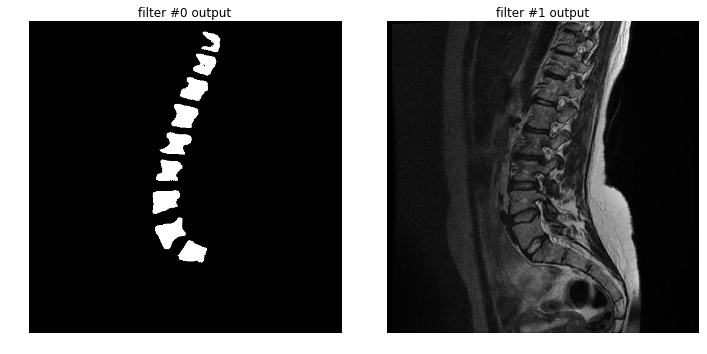

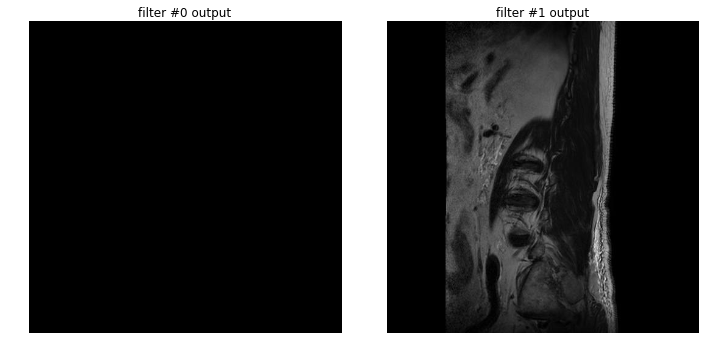

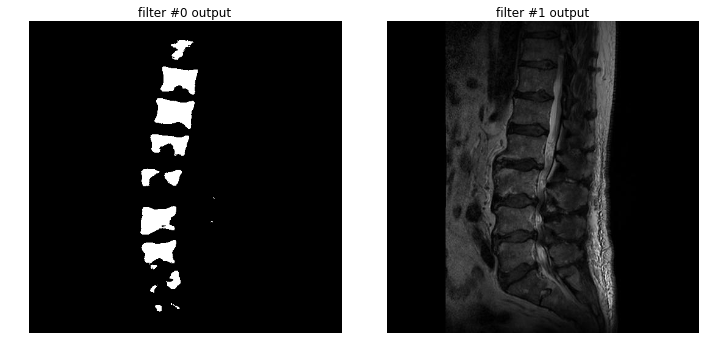

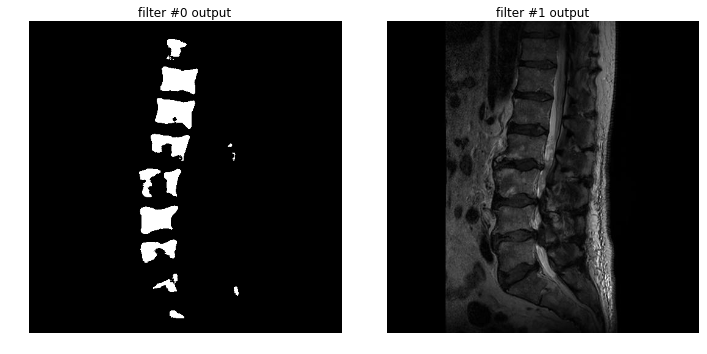

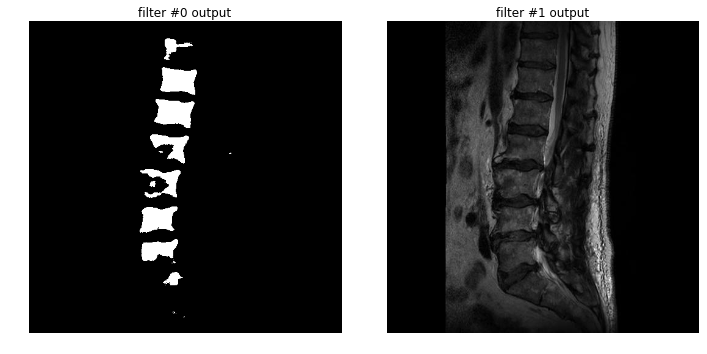

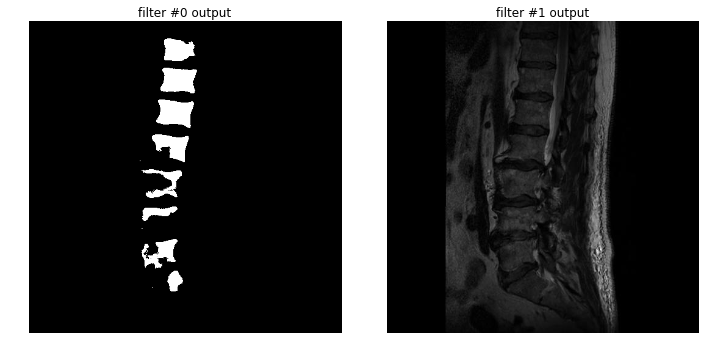

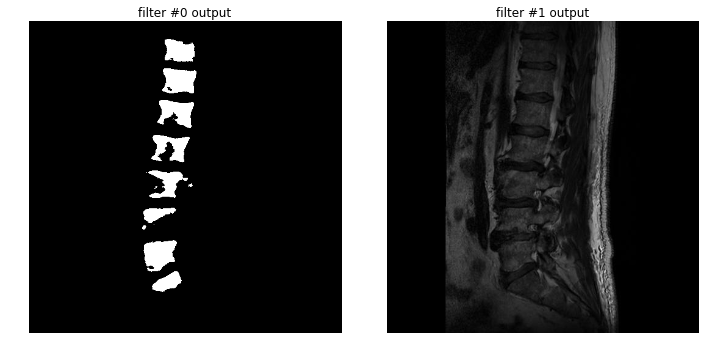

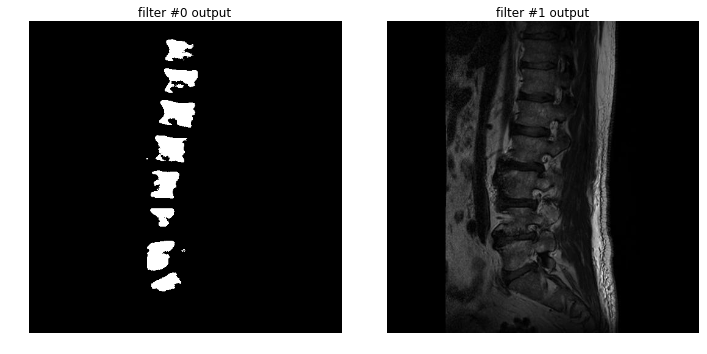

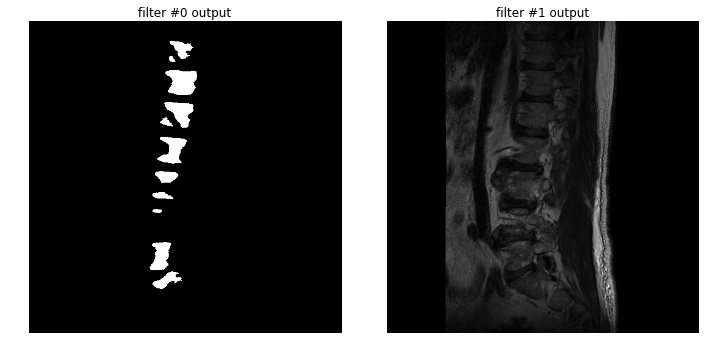

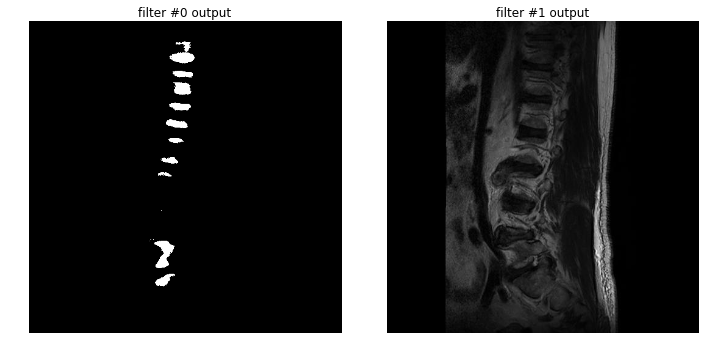

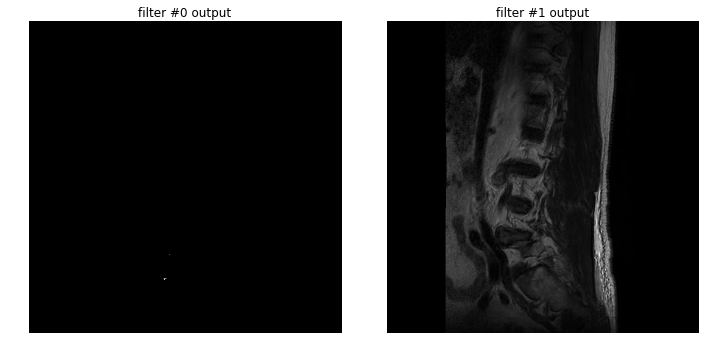

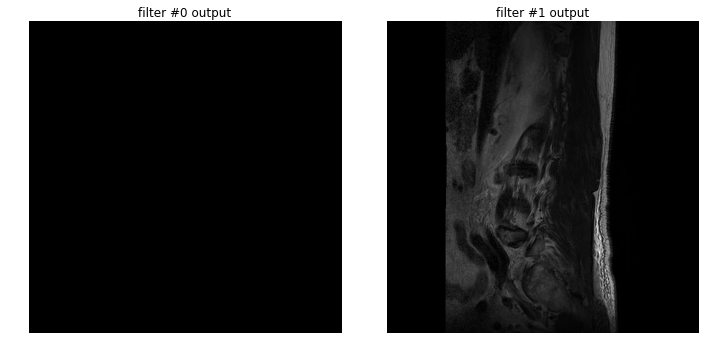

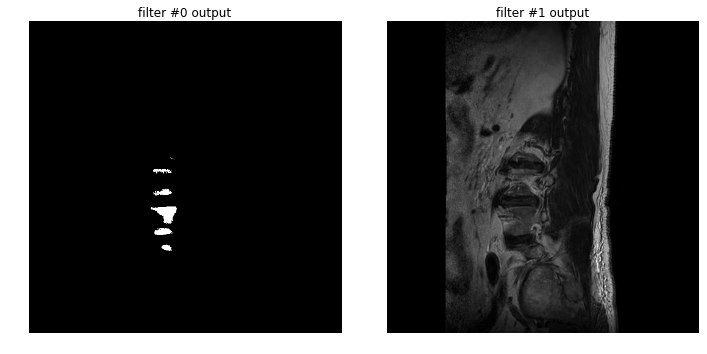

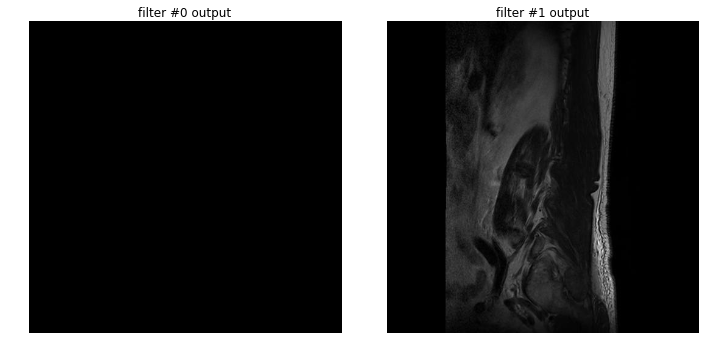

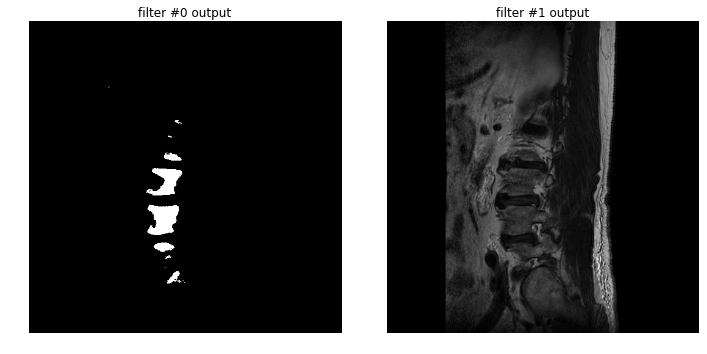

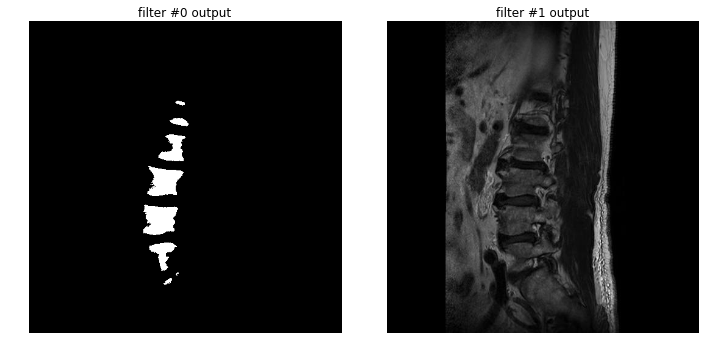

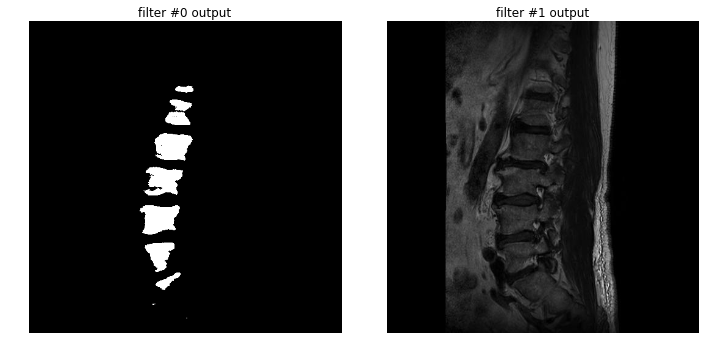

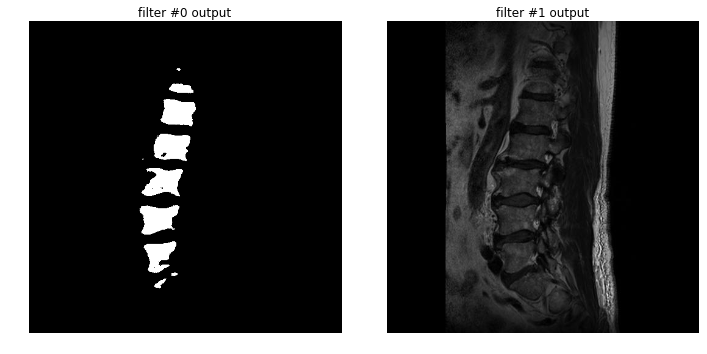

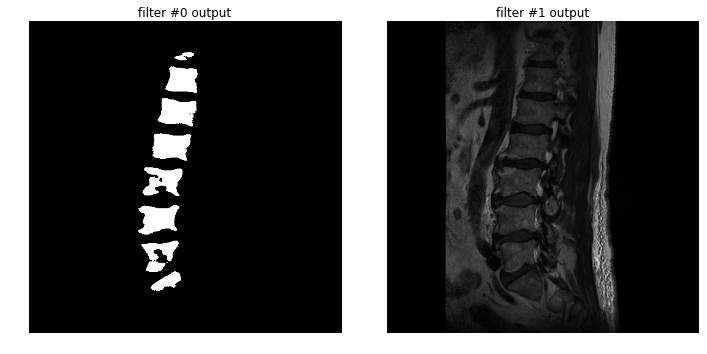

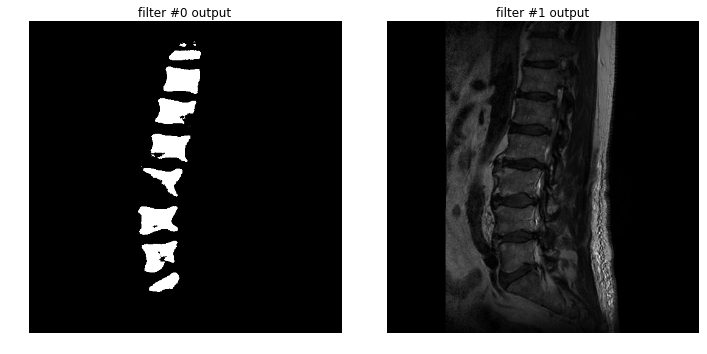

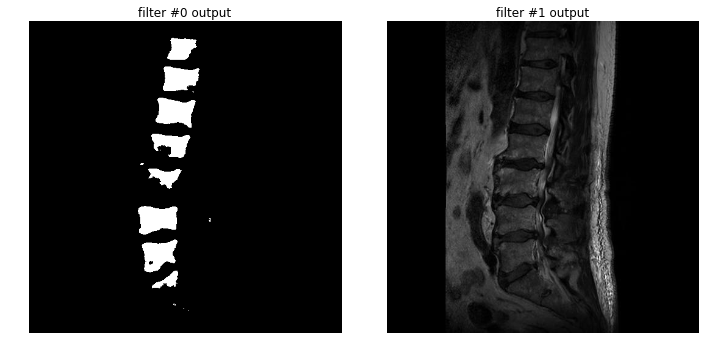

In [3]:
ori = read_image_feed(train_data[10][0])
pred = net.predict(ori)
show_image(pred,ori)

#ff = "/media/D/SpineDataset/spine_seg/image/AKa25.jpg"
dd = '/media/D/lisa_mri_test/*.jpg'
dd = '/media/D/SpineDataset/spine_seg/test/*.jpg'
import glob
ll = glob.glob(dd)
for ff in ll:
    ori = read_img_raw(ff)
    feed = read_image_feed(ff)
    pred = net.predict(feed)
    pred = pred.reshape(512,512)
    show_image(pred,ori)
    #pred = net.check_layer(net.score,feed)
    #show_image(pred[:,:,:,0],pred[:,:,:,1],ori)